<a href="https://colab.research.google.com/github/mrutherfoord/portfolio/blob/master/Van_Gogh_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Van Gogh Classifier
In this project, I created some CNNs to see if one could accurately predict whether or not a tile from a painting could be classified as a Van Gogh or not. 
(see the painting divider/entropy calculator notebook to see how paintings were divided). After testing various-sized tiles, with 100x100px corresponding to more of a brush-stroke level, and 400x400px to more of a compositional level, the 400x400px tiles seemed to perform the best. This indicates that the way Van Gogh painted his flowers is more important to authorship than his brushstrokes.

This notebook looks at three models (with only a few epochs) that were used to create filter maps for the hidden layers.

# Data Preprocessing

In [0]:
import os
from random import shuffle
from glob import glob

In [0]:
#adding prefixes to files
#pre = "not_"
directory = 'images/dataset/not/400x400'

#for filename in os.listdir(directory): 
#    os.rename(os.path.join(directory, filename),
#              os.path.join(directory,pre + filename))

In [0]:
items = [f for f in os.listdir(directory)]

In [0]:
with open('images/not400.txt', 'w') as f:
    for item in items:
        f.write("%s\n" % item)

In [0]:
import pandas as pd

vangogh_wext = pd.read_csv('images/vangogh400.txt', names=['file'])
not_wext = pd.read_csv('images/not400.txt', names=['file'])

vangogh_wext['class'] = '1'
not_wext['class'] = '0'

data_wext = vangogh_wext.append(not_wext)

data_wext.to_csv("images/all_w_ext400.csv", index=0)

In [0]:
from sklearn.model_selection import train_test_split

X = data_wext['file']
y = data_wext['class']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [0]:
X_train_l = X_train.tolist()
X_test_l = X_test.tolist()

In [0]:
import shutil

src = 'images/data2/all' # source of all images
dest_test = 'images/data400/test' # test folder
dest_train = 'images/data400/train' # train folder

# move to train
for file in os.listdir(src):
  if file in X_train_l:
    name = os.path.join(src, file )
    if os.path.isfile( name ) :
        shutil.copy( name, dest_train)
    else :
        print ('file does not exist', name)

# move to test
for file in os.listdir(src):
  if file in X_test_l:
    name = os.path.join(src, file )
    if os.path.isfile( name ) :
        shutil.copy( name, dest_test)
    else :
        print ('file does not exist', name)  

In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mimg
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,7)
import PIL
from scipy import misc

import os

from sklearn.metrics import classification_report, confusion_matrix

# Importing the Keras libraries and packages
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization

Using TensorFlow backend.


# Model 1
Model 1 uses 3 convolutional layers with 32 filters each, and a dense layer of 32 nodes.

In [0]:
model400_1 = Sequential()
model400_1.add(Conv2D(32, (3, 3), input_shape = (400, 400, 3), activation = 'relu', padding = 'same'))
model400_1.add(MaxPooling2D(pool_size = (2, 2)))

model400_1.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model400_1.add(MaxPooling2D(pool_size = (2, 2)))

model400_1.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model400_1.add(MaxPooling2D(pool_size = (2, 2)))

model400_1.add(Flatten())

model400_1.add(Dense(units = 32, activation = 'relu'))
model400_1.add(Dropout(0.5))

model400_1.add(Dense(units = 1, activation = 'sigmoid'))
model400_1.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [0]:
model400_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 400, 400, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 80000)             0         
__________

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split = .2)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('images/data400/train', 
                                                 target_size = (400, 400), 
                                                 batch_size = 16,
                                                 class_mode = 'binary',
                                                 subset = 'training')

validation_set = train_datagen.flow_from_directory('images/data400/train',
                                                   target_size = (400, 400),
                                                   batch_size = 16,
                                                   class_mode='binary',
                                                   subset='validation')

test_set = test_datagen.flow_from_directory('images/data400/test', 
                                            target_size = (400, 400),
                                            batch_size = 16,
                                            class_mode = 'binary')

Found 2837 images belonging to 2 classes.
Found 709 images belonging to 2 classes.
Found 395 images belonging to 2 classes.


In [0]:
model400_1.fit_generator(training_set, steps_per_epoch = 2837, epochs = 4, validation_data = validation_set,
                         validation_steps = 709, verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/4
2837/2837 [==============================] - 2961s 1s/step - loss: 0.3502 - acc: 0.8418 - val_loss: 0.9008 - val_acc: 0.6763
Epoch 2/4
2837/2837 [==============================] - 2854s 1s/step - loss: 0.1076 - acc: 0.9585 - val_loss: 1.7398 - val_acc: 0.6601
Epoch 3/4
2837/2837 [==============================] - 2782s 981ms/step - loss: 0.0452 - acc: 0.9847 - val_loss: 1.9247 - val_acc: 0.6239
Epoch 4/4
2837/2837 [==============================] - 2789s 983ms/step - loss: 0.0357 - acc: 0.9880 - val_loss: 2.0890 - val_acc: 0.6751


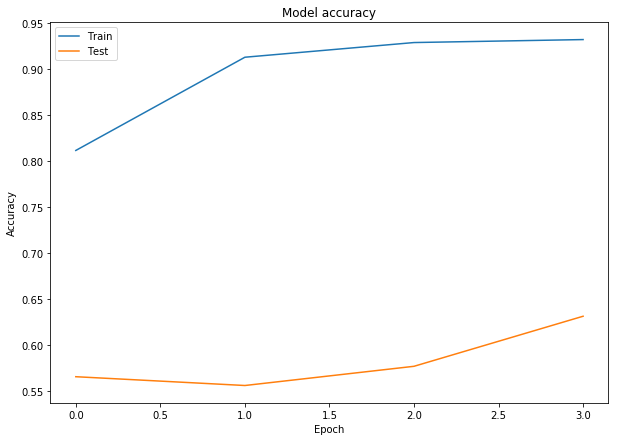

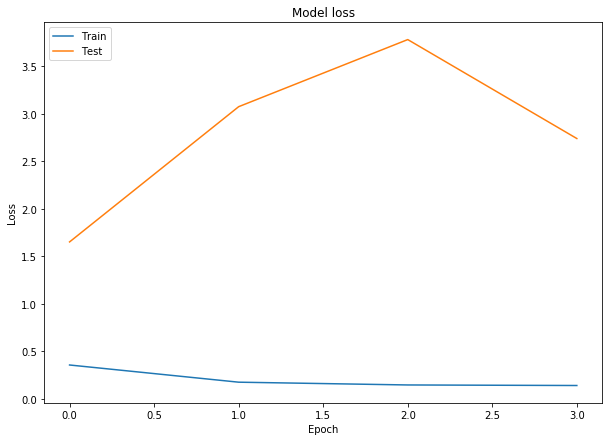

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(classifier.history.history['acc'])
plt.plot(classifier.history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(classifier.history.history['loss'])
plt.plot(classifier.history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

I chose an image to look at the filter maps for each of the 3 convolutional layers in the model.

In [0]:
# summarize feature map shapes
for i in range(len(classifier.layers)):
    layer = classifier.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d_11 (?, 200, 200, 16)
3 conv2d_12 (?, 100, 100, 16)
6 conv2d_13 (?, 50, 50, 16)


In [0]:
from keras.models import Model
# redefine model to output right after the first hidden layer
model = Model(inputs=classifier.inputs, outputs=classifier.layers[1].output)

In [0]:
from keras.preprocessing.image import load_img, img_to_array
import cv2

# load the image with the required shape
# img = load_img('images/data/test/vangogh/vangogh_11-5.jpg', target_size=(200, 200))
img = cv2.imread('images/data/test/vangogh/vangogh_11-5.jpg')

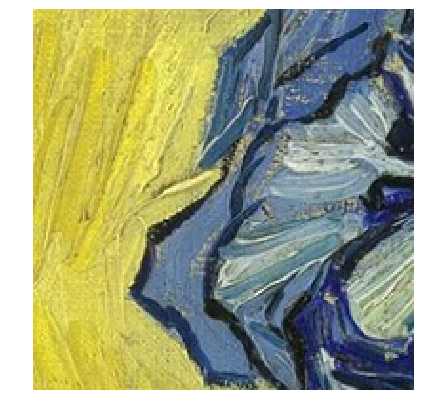

In [0]:
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.axis('off')
plt.show()

# Feature Maps for each Convolutional Layer

In [0]:
img2 = np.reshape(img, [1,200,200,3])

In [0]:
# get feature map for first hidden layer
feature_maps = model.predict(img2)

<Figure size 432x288 with 0 Axes>

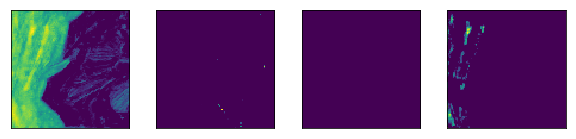

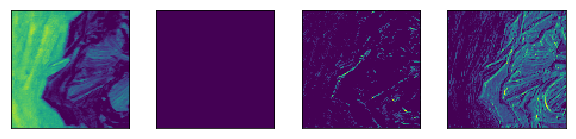

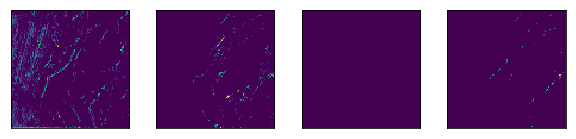

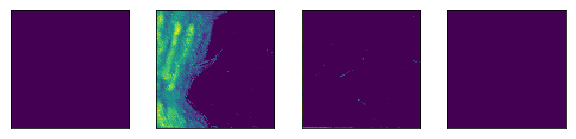

In [0]:
# plot all 16 feature maps in an 4x4 squares
square = 4
ix = 1
fig = plt.gcf()
for _ in range(square):
    fig=plt.figure(figsize=(10, 10))
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
    # show the figure
    plt.show()
fig.savefig('convL1.png')

In [0]:
model2 = Model(inputs=classifier.inputs, outputs=classifier.layers[3].output)

In [0]:
feature_maps = model2.predict(img2)

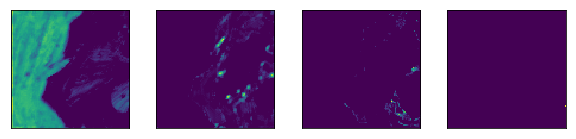

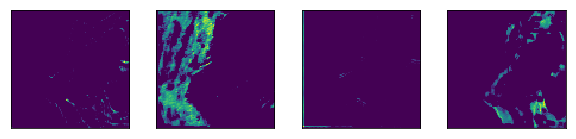

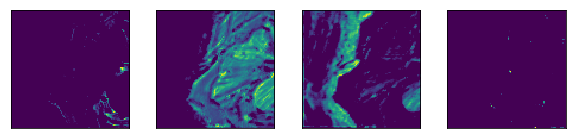

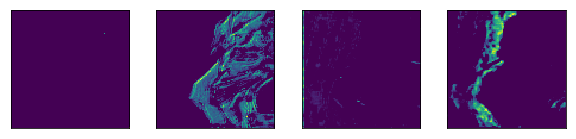

<Figure size 432x288 with 0 Axes>

In [0]:
# plot all 16 maps in an 4x4 squares
square = 4
ix = 1
for _ in range(square):
    fig=plt.figure(figsize=(10, 10))
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
    # show the figure
    plt.show()
plt.savefig('convL2.png')

In [0]:
model3 = Model(inputs=classifier.inputs, outputs=classifier.layers[6].output)

In [0]:
feature_maps = model3.predict(img2)

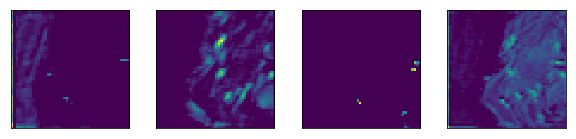

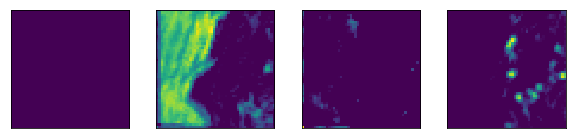

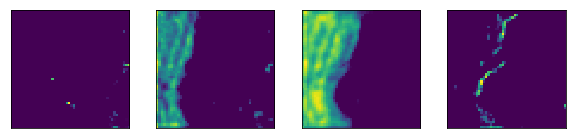

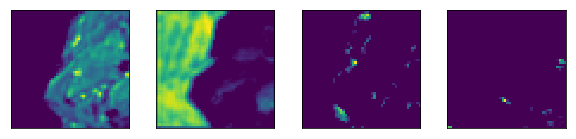

<Figure size 432x288 with 0 Axes>

In [0]:
# plot all 16 maps in an 4x4 squares
square = 4
ix = 1
for _ in range(square):
    fig=plt.figure(figsize=(10, 10))
    for _ in range(square):
        # specify subplot and turn of axis
        ax = plt.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
    # show the figure
    plt.show()
plt.savefig('convL3.png')

Each convolutional layer picks up details. Larger, more general shapes are detected in the first layer, while smaller highlights and shadows are detected in the 3rd.

# Model 2
model 2 uses 3 convolutional layers with 32, 16, and 16 filters respectively, followed by a dense layer of 16 nodes.

In [0]:
model400_2 = Sequential()
model400_2.add(Conv2D(32, (3, 3), input_shape = (400, 400, 3), activation = 'relu', padding = 'same'))
model400_2.add(MaxPooling2D(pool_size = (2, 2)))

model400_2.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same'))
model400_2.add(MaxPooling2D(pool_size = (2, 2)))

model400_2.add(Conv2D(16, (3, 3), activation = 'relu', padding = 'same'))
model400_2.add(MaxPooling2D(pool_size = (2, 2)))

model400_2.add(Flatten())

model400_2.add(Dense(units = 16, activation = 'relu'))
model400_2.add(Dropout(0.5))

model400_2.add(Dense(units = 1, activation = 'sigmoid'))
model400_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
model400_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 400, 400, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 200, 200, 16)      4624      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 100, 100, 16)      2320      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 50, 50, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 40000)             0         
__________

In [0]:
model400_2.fit_generator(training_set, steps_per_epoch = 2837, epochs = 6, validation_data = validation_set,
                         validation_steps = 709, verbose=1)

Epoch 1/6
2837/2837 [==============================] - 2182s 769ms/step - loss: 0.6890 - acc: 0.5477 - val_loss: 0.6884 - val_acc: 0.5484
Epoch 2/6
2837/2837 [==============================] - 2198s 775ms/step - loss: 0.6884 - acc: 0.5487 - val_loss: 0.6884 - val_acc: 0.5488
Epoch 3/6
2837/2837 [==============================] - 2132s 751ms/step - loss: 0.6886 - acc: 0.5481 - val_loss: 0.6885 - val_acc: 0.5481
Epoch 4/6
2837/2837 [==============================] - 2133s 752ms/step - loss: 0.6885 - acc: 0.5484 - val_loss: 0.6883 - val_acc: 0.5494
Epoch 5/6
2837/2837 [==============================] - 2131s 751ms/step - loss: 0.6885 - acc: 0.5483 - val_loss: 0.6884 - val_acc: 0.5485
Epoch 6/6
2837/2837 [==============================] - 2121s 748ms/step - loss: 0.6885 - acc: 0.5483 - val_loss: 0.6884 - val_acc: 0.5486


# Model 3
This model uses 2 convolutional layers with 32 filters each and a dense layer with 64 nodes.

In [0]:
model400_3 = Sequential()
model400_3.add(Conv2D(32, (3, 3), input_shape = (400, 400, 3), activation = 'relu', padding = 'same'))
model400_3.add(MaxPooling2D(pool_size = (2, 2)))

model400_3.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model400_3.add(MaxPooling2D(pool_size = (2, 2)))

model400_3.add(Flatten())

model400_3.add(Dense(units = 64, activation = 'relu'))
model400_3.add(Dropout(0.5))

model400_3.add(Dense(units = 1, activation = 'sigmoid'))
model400_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
model400_3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 400, 400, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                20480064  
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
__________

In [0]:
model400_3.fit_generator(training_set, steps_per_epoch = 2837, epochs = 5, validation_data = validation_set,
                         validation_steps = 709, verbose=1)

Epoch 1/5
2837/2837 [==============================] - 3042s 1s/step - loss: 0.3131 - acc: 0.9108 - val_loss: 1.2102 - val_acc: 0.7145
Epoch 2/5
2837/2837 [==============================] - 3081s 1s/step - loss: 0.0248 - acc: 0.9925 - val_loss: 1.3187 - val_acc: 0.7239
Epoch 3/5
2837/2837 [==============================] - 2933s 1s/step - loss: 0.0199 - acc: 0.9950 - val_loss: 1.7173 - val_acc: 0.7443
Epoch 4/5
2837/2837 [==============================] - 3020s 1s/step - loss: 0.0079 - acc: 0.9980 - val_loss: 2.4946 - val_acc: 0.6917
Epoch 5/5
2837/2837 [==============================] - 2984s 1s/step - loss: 0.0131 - acc: 0.9965 - val_loss: 1.5015 - val_acc: 0.7313


# Model 4
This model uses two convolutional layers with 32 filters and a dense layer with 32 nodes.

In [0]:
model400_4 = Sequential()
model400_4.add(Conv2D(32, (3, 3), input_shape = (400, 400, 3), activation = 'relu', padding = 'same'))
model400_4.add(MaxPooling2D(pool_size = (2, 2)))

model400_4.add(Conv2D(32, (3, 3), activation = 'relu', padding = 'same'))
model400_4.add(MaxPooling2D(pool_size = (2, 2)))

model400_4.add(Flatten())

model400_4.add(Dense(units = 32, activation = 'relu'))
model400_4.add(Dropout(0.5))

model400_4.add(Dense(units = 1, activation = 'sigmoid'))
model400_4.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [0]:
model400_4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 400, 400, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 200, 200, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 200, 200, 32)      9248      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                10240032  
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
__________

In [0]:
model400_4.fit_generator(training_set, steps_per_epoch = 2837, epochs = 4, validation_data = validation_set,
                         validation_steps = 709, verbose=1)

Epoch 1/4
2837/2837 [==============================] - 2710s 955ms/step - loss: 1.2451 - acc: 0.5799 - val_loss: 0.7168 - val_acc: 0.5551
Epoch 2/4
2837/2837 [==============================] - 2707s 954ms/step - loss: 0.1738 - acc: 0.9185 - val_loss: 2.9051 - val_acc: 0.6312
Epoch 3/4
2837/2837 [==============================] - 2753s 970ms/step - loss: 0.0585 - acc: 0.9805 - val_loss: 2.8113 - val_acc: 0.6449
Epoch 4/4
2837/2837 [==============================] - 2927s 1s/step - loss: 0.0323 - acc: 0.9900 - val_loss: 3.4513 - val_acc: 0.6353


Model 3 was performing the best, so i used it to make predictions on the test set.

In [0]:
# making predictions on test set for model 3
results = model400_3.predict_generator(test_set, steps=25)

In [0]:
# checking accuracy of model 3
model400_3.evaluate_generator(test_set, steps=25)

[1.2833971189169944, 0.7974683542794819]

Model 3 was about 80% accurate for detecting Van Gogh paintings.

# Filter maps for model 3

In [0]:
# summarize feature map shapes
for i in range(len(model400_3.layers)):
    layer = model400_3.layers[i]
    # check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)

0 conv2d_7 (?, 400, 400, 32)
2 conv2d_8 (?, 200, 200, 32)


In [0]:
from keras.models import Model
# redefine model to output right after the first hidden layer
model = Model(inputs=model400_3.inputs, outputs=model400_3.layers[0].output)

In [0]:
from keras.preprocessing.image import load_img, img_to_array
import cv2

# load the image with the required shape
#img = load_img('images/data/test/vangogh/vangogh_11-5.jpg', target_size=(200, 200))
img = cv2.imread('images/data400/test/vangogh/vangogh_28-29.jpg')

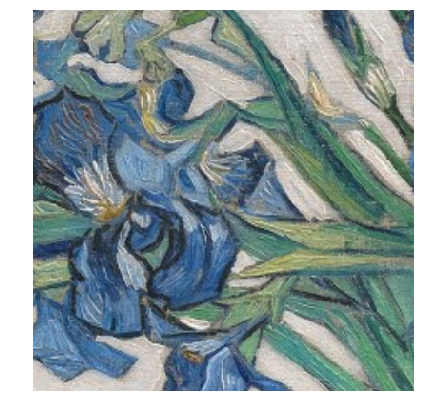

In [0]:
plt.figure(figsize=(7,7))
plt.imshow(img)
plt.axis('off')
plt.show()

In [0]:
img2 = np.reshape(img, [1,400,400,3])

In [0]:
# get feature map for first hidden layer
feature_maps = model.predict(img2)

<Figure size 432x288 with 0 Axes>

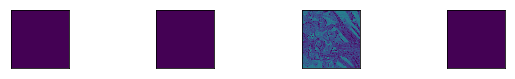

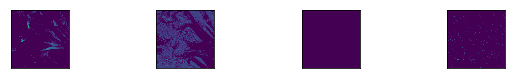

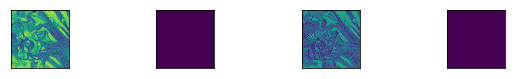

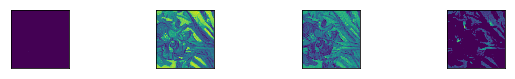

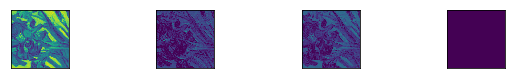

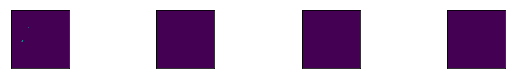

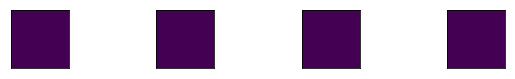

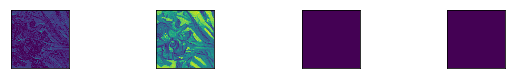

In [0]:
#plot all 32 maps in an 4x8 grid
square = 8
col = 4
ix = 1
fig = plt.gcf()
for _ in range(square):
    fig=plt.figure(figsize=(10, 10))
    for _ in range(col):
        # specify subplot and turn of axis
        ax = plt.subplot(square, col, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
plt.savefig('finallayer1.png')


In [0]:
model2 = Model(inputs=model400_3.inputs, outputs=model400_3.layers[2].output)

In [0]:
feature_maps = model2.predict(img2)

<Figure size 432x288 with 0 Axes>

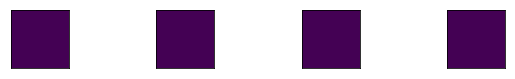

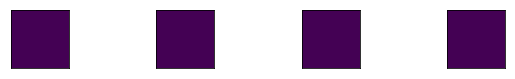

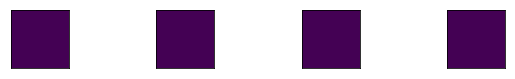

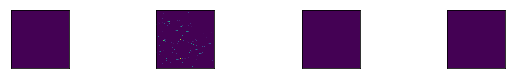

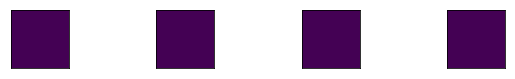

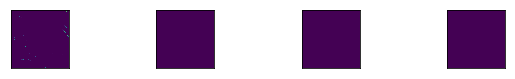

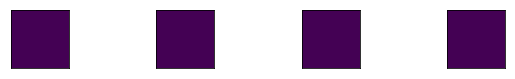

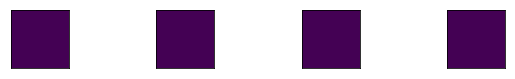

In [0]:
#plot all 32 maps in an 8x8 squares
square = 8
col = 4
ix = 1
fig = plt.gcf()
for _ in range(square):
    fig=plt.figure(figsize=(10, 10))
    for _ in range(col):
        # specify subplot and turn of axis
        ax = plt.subplot(square, col, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_maps[0, :, :, ix-1])
        ix += 1
plt.savefig('finallayer1.png')

In model 3, most of the work is done in the first layer, while the second layer appears to only be picking up some brush stroke highlights.

# Conclusion
Model 3 appears to be performing the best, but more tests should be run with more epochs and potentially more nodes in the dense layer to see if higher accuracy can be achieved.